**MAESTRÍA EN INTELIGENCIA ARTIFICIAL APLICADA**

**Curso: TC4029 - Ciencia y analítica de datos**

Tecnológico de Monterrey

Prof Grettel Barceló Alonso

**Semana 9**
Regresión Logística

---

*   NOMBRE: Karen Lizette Rodríguez Hernández
*   MATRÍCULA: A01197734

*   NOMBRE: Marcelo Ismael López Verdugo
*   MATRÍCULA: A00959089

*   NOMBRE: Angel García Ortega
*   MATRÍCULA: A01796653

*   NOMBRE: Juan Carlos Garcés Carrillo
*   MATRÍCULA: A01796283

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
DIR = "/content/drive/MyDrive/MNA/1-Trimestre/CienciaDatos/Equipo 29/Semana 9"
os.chdir(DIR)

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
data_df = pd.read_csv('data.csv')
data_df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


# **Parte 1**. EDA

Haz que el `id` sea el índice del dataframe y efectúa una exploración inicial de los datos a través de:

In [5]:
data_df.set_index('id', inplace=True)



1a) Estadísticas descriptivas para todas las variables del dataframe.

In [6]:
# Estadísticas descriptivas de variables numéricas
data_df.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [7]:
# Estadísticas descriptivas de variables categóricas
data_df.describe(include='object')

,diagnosis
count,569
unique,2
top,B
freq,357


1b) Valores únicos por variable para identificar posibles variables categóricas.

In [8]:
# Valores únicos
data_df.nunique()

,0
diagnosis,2
radius_mean,456
texture_mean,479
perimeter_mean,522
area_mean,539
smoothness_mean,474
compactness_mean,537
concavity_mean,537
concave points_mean,542
symmetry_mean,432


La única variable categórica es `diagnosis` ya que solo tiene 2 valores únicos.

1c) Búsqueda de valores faltantes.

In [9]:
# Valores faltantes
data_df.isna().sum()

,0
diagnosis,0
radius_mean,0
texture_mean,0
perimeter_mean,0
area_mean,0
smoothness_mean,0
compactness_mean,0
concavity_mean,0
concave points_mean,0
symmetry_mean,0


Ninguna variable tiene valores faltantes.

1d) Diagrama de barras para determinar la frecuencia de los diagnósticos (cantidad de observaciones con resultado benigno y maligno)

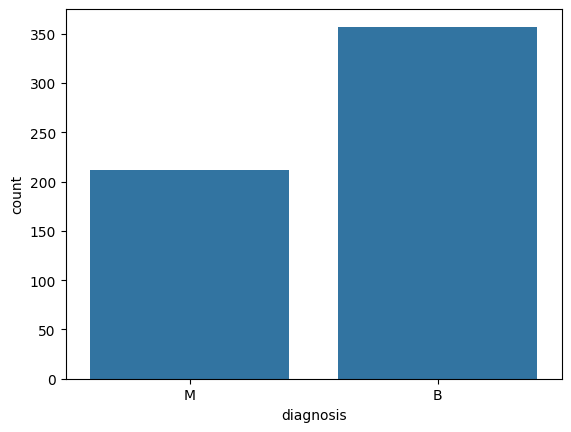

In [10]:
# Gráfica de barras de diagnosis
sns.countplot(x='diagnosis', data=data_df)
plt.show()

2. Como hay tres valores relacionados con la misma característica (`mean`, `se` y `worst`) es muy probable que exista multicolinealidad en el conjunto.

La multicolinealidad en regresión es una condición que ocurre cuando algunas variables predictoras están fuertemente correlacionadas entre sí, de tal manera que si se incluyen simultáneamente en un modelo, impiden explicar de manera correcta el efecto que cada una tiene sobre la variable respuesta. Existen muchas formas de analizar si hay colinealidad en los modelos, una de ellas es el alto coeficiente de correlación entre variables.

Para observar este efecto, elabora un mapa de calor que cuantifique la correlación de las variables numéricas en el dataframe.

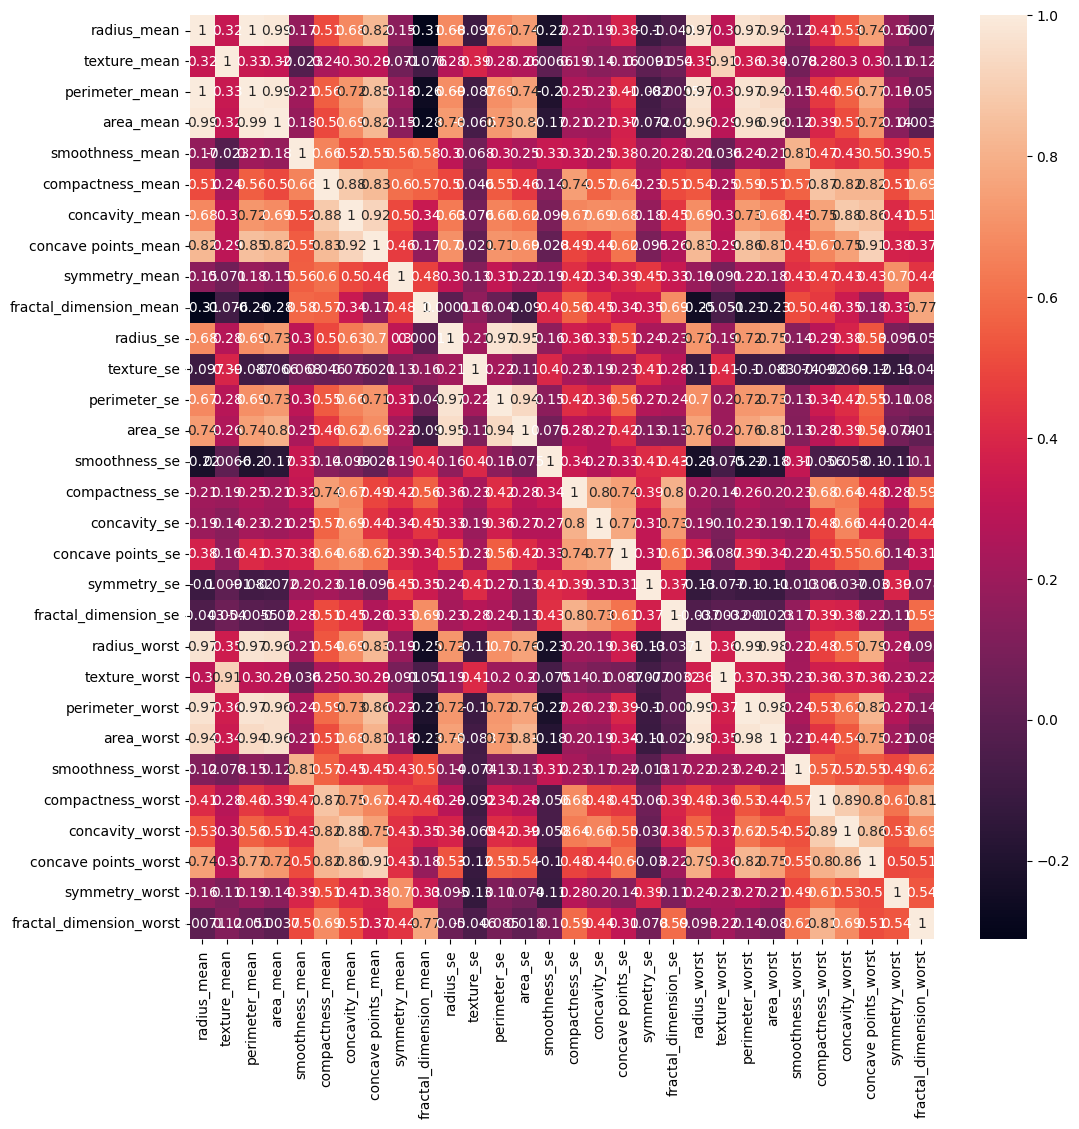

In [11]:
# Mapa de calor de variables numéricas
data_df_num = data_df.select_dtypes(include=np.number)
plt.figure(figsize=(12, 12))
sns.heatmap(data_df_num.corr(), annot=True)
plt.show()

Si te fijas en los valores de correlación entre las variables `_mean` y `_worst` es evidente la multicolinearidad.

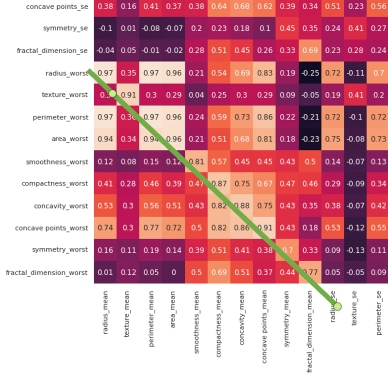

Por ejemplo, la columna `radius_mean` tiene una correlación de 0.97 con la columna `radius_worst`. Esto es algo inevitable, porque las columnas "peores" son esencialmente solo un subconjunto de las columnas "medias".

Para solucionar el problema numérico de la multicolinealidad, tradicionalmente se recurre a eliminar variables o efectuar análisis de componentes principales (PCA) con las `X`’s y usar los componentes como variables independientes en un modelo final.

Conduciremos esta actividad en esos dos sentidos.


# **Parte 2**. Modelo con eliminación de variables altamente correlacionadas  

Elimina las variables altamente correlacionadas:

3a) Ahora que sabes que las variables `_mean` y `_worst` tienen correlación alta, hay que quitar del dataframe un conjunto. Borra las columnas `_worst`.

In [12]:
# Eliminar columnas con sufijo _worst
columns_worst = [col for col in data_df.columns if '_worst' in col]
print(columns_worst)
data_df = data_df.drop(columns=columns_worst)

['radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst']


3b. Entre las variables `_mean`, identifica patrones lineales con diagramas de dispersión usando:



```Python
sns.pairplot(data=data_df[['radius_mean',
        'texture_mean',
        'perimeter_mean',
        'area_mean',
        'smoothness_mean',
        'compactness_mean',
        'concavity_mean',
        'concave points_mean',
        'symmetry_mean',
        'fractal_dimension_mean']])
```




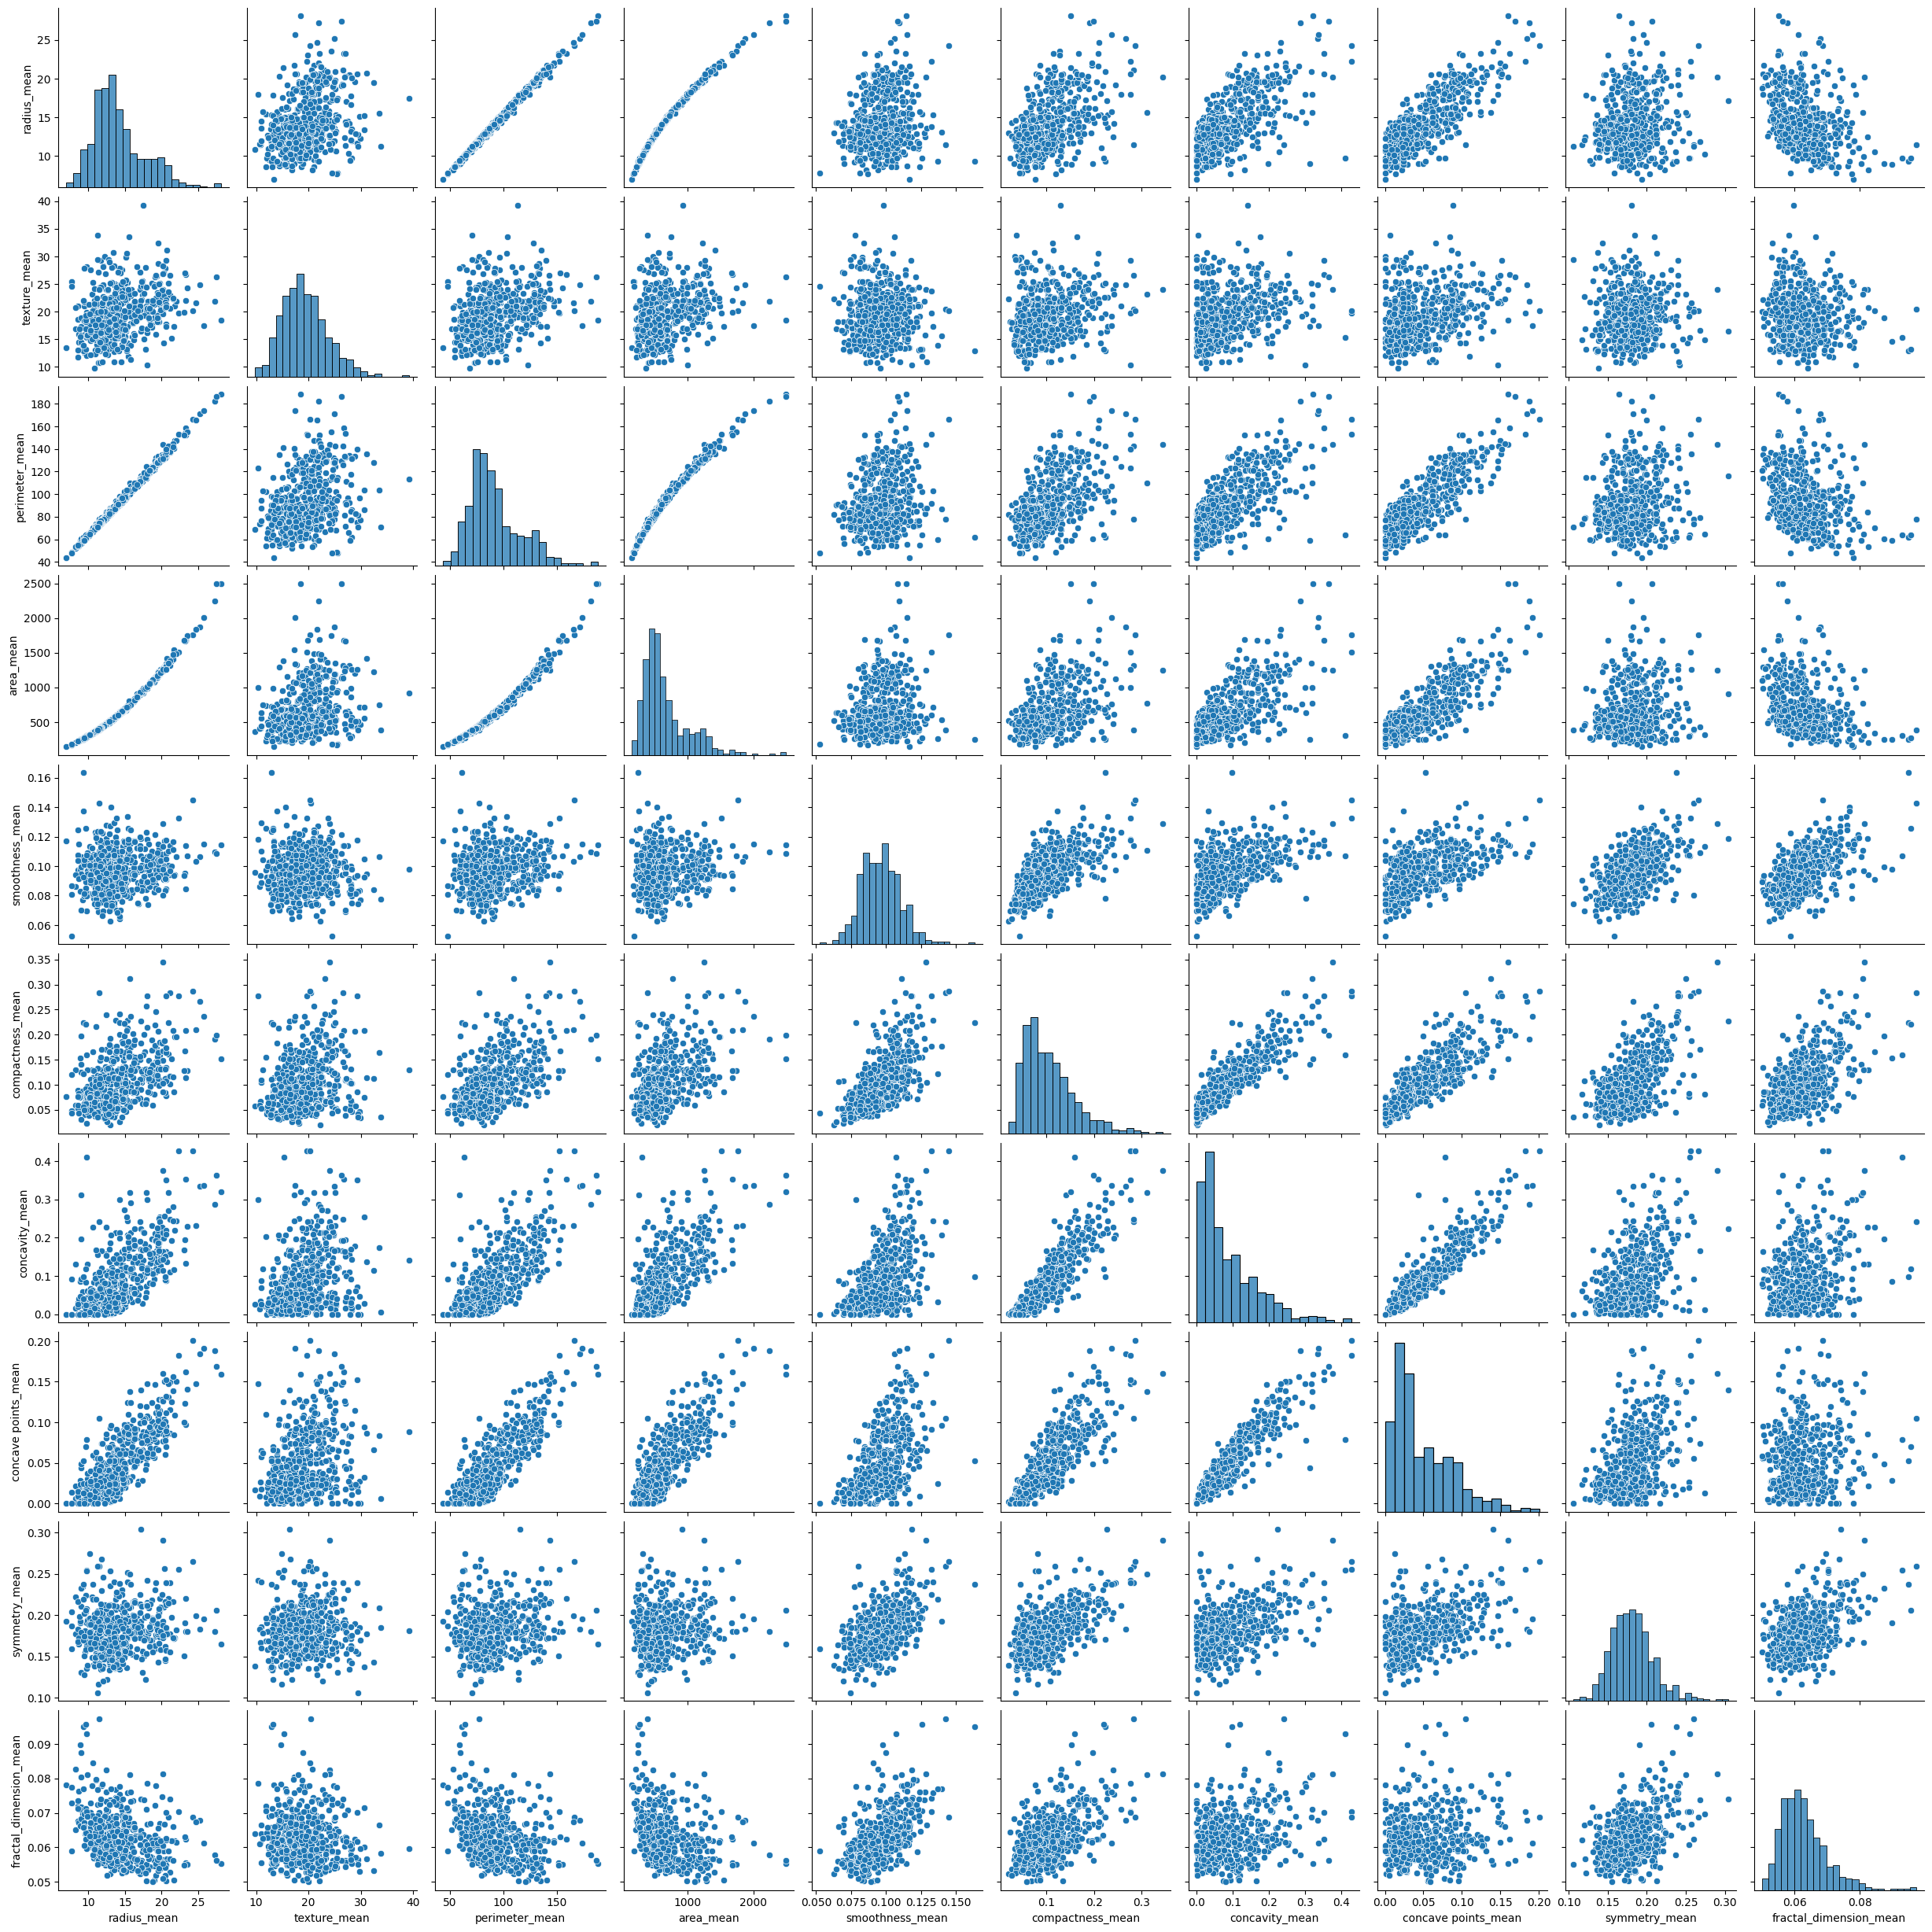

In [13]:
# Diagramas de dispersión
sns.pairplot(data=data_df[['radius_mean',
        'texture_mean',
        'perimeter_mean',
        'area_mean',
        'smoothness_mean',
        'compactness_mean',
        'concavity_mean',
        'concave points_mean',
        'symmetry_mean',
        'fractal_dimension_mean']])

De la matriz podrás observar relaciones lineales bastante evidentes entre:


*   `radius_mean`, `perimeter_mean` y `area_mean`
*   `compactness_mean`, `concavity_mean`, `concave_points_mean`

Sabemos que el perímetro y el área de un círculo, se calculan a partir del radio. Entonces, la relación entre las primeras tres variables es muy clara para nosotros.

3c) Elabora otro mapa de calor para confirmar con los valores de correlación.


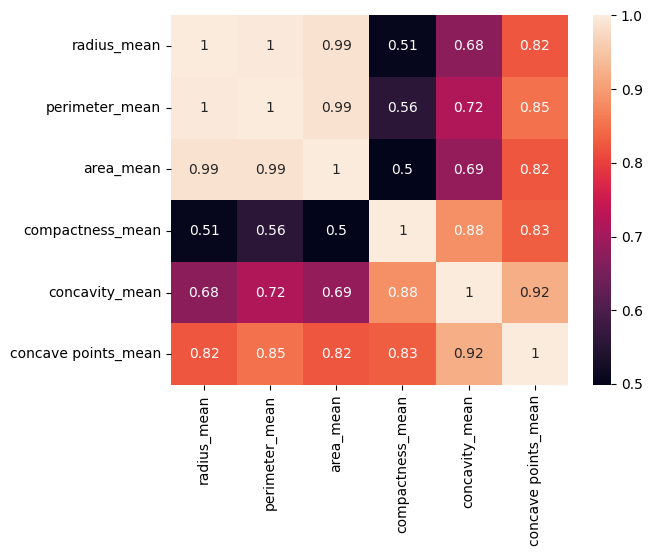

In [14]:
# Mapa de calor
related_cols = ['radius_mean', 'perimeter_mean', 'area_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean']
corr_matrix = data_df[related_cols].corr()
sns.heatmap(corr_matrix, annot=True)
plt.show()

3d) Después de observar los valores, nos quedaremos con sólo una variable de cada trío: `radius_mean` y `compactness_mean`. Elimina las restantes, no sólo del conjunto `_mean`, sino también de `_se`.

In [15]:
# Eliminar variables
cols_to_drop = ['perimeter_mean', 'area_mean', 'concavity_mean', 'concave points_mean', 'perimeter_se', 'area_se', 'concavity_se', 'concave points_se']
data_df = data_df.drop(columns=cols_to_drop)

Observa la distribución de las variables resultantes (deben ser 12):  

In [16]:
# Dataframe resultante
data_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 569 entries, 842302 to 92751
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   diagnosis               569 non-null    object 
 1   radius_mean             569 non-null    float64
 2   texture_mean            569 non-null    float64
 3   smoothness_mean         569 non-null    float64
 4   compactness_mean        569 non-null    float64
 5   symmetry_mean           569 non-null    float64
 6   fractal_dimension_mean  569 non-null    float64
 7   radius_se               569 non-null    float64
 8   texture_se              569 non-null    float64
 9   smoothness_se           569 non-null    float64
 10  compactness_se          569 non-null    float64
 11  symmetry_se             569 non-null    float64
 12  fractal_dimension_se    569 non-null    float64
dtypes: float64(12), object(1)
memory usage: 62.2+ KB


4a) Utilizando histogramas. Guarda en una variable (`skew_cols`) las que tengan marcado sesgo positivo. Para dar seguridad a tu selección, elige aquellas cuyo resultado de aplicar la función `skew()` sea mayor a 1.

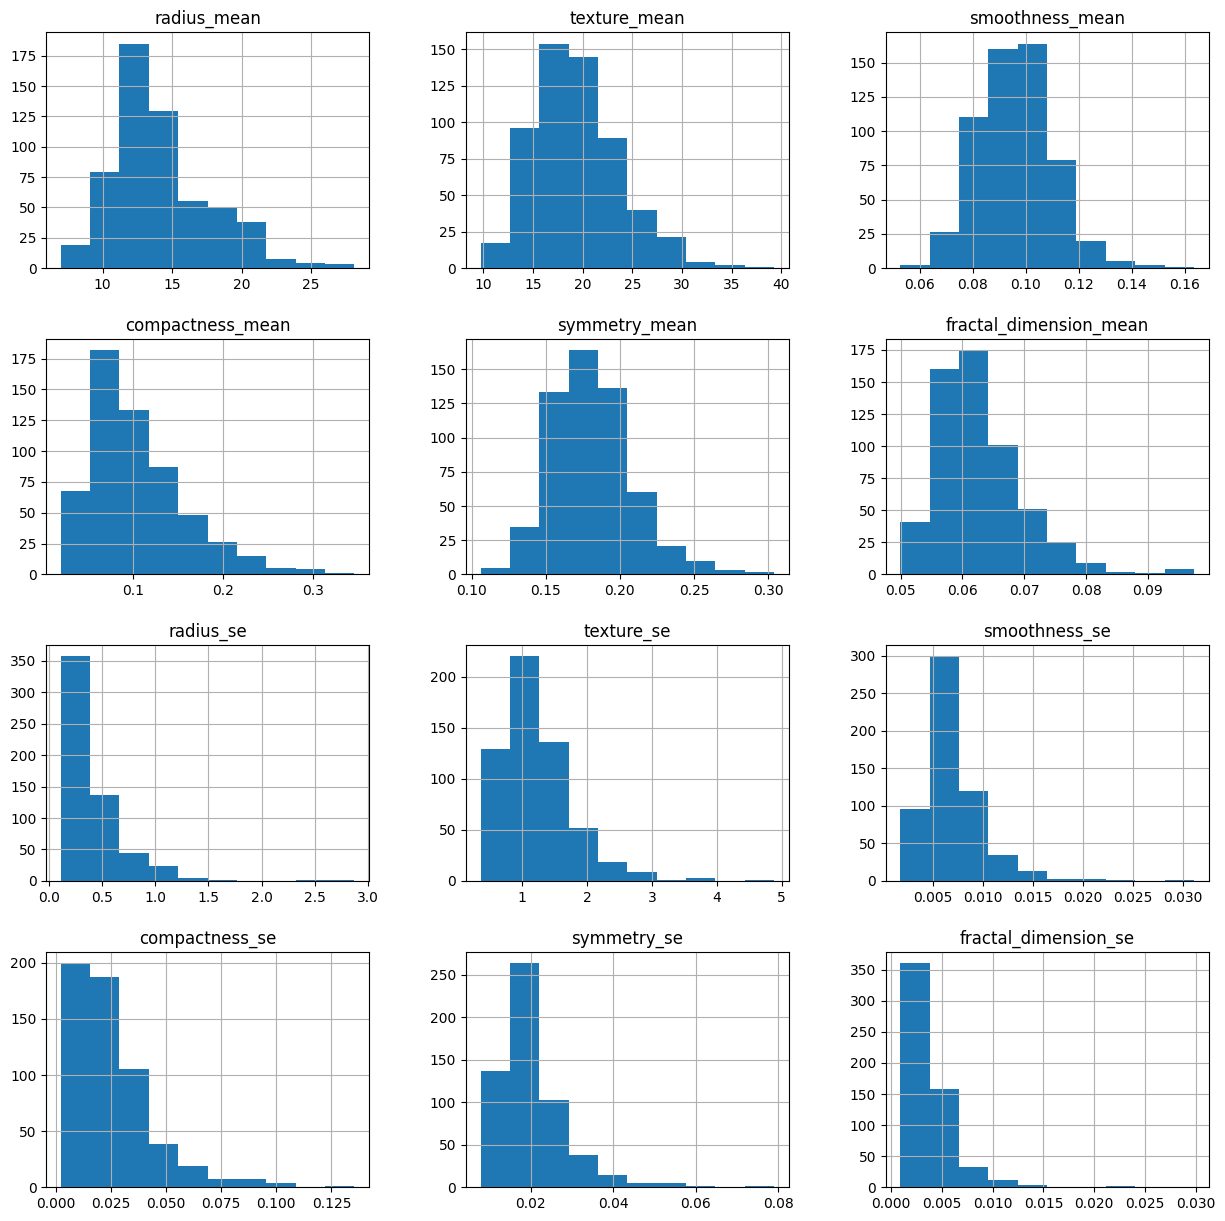

In [17]:
# Histogramas de cada variable
data_df_num = data_df.select_dtypes(include=np.number)
data_df_num.hist(figsize=(15, 15))
plt.show()

In [18]:
# Sesgo de cada variable
skew_cols = []
data_df_num.skew()

,0
radius_mean,0.942380
texture_mean,0.650450
smoothness_mean,0.456324
compactness_mean,1.190123
symmetry_mean,0.725609
fractal_dimension_mean,1.304489
radius_se,3.088612
texture_se,1.646444
smoothness_se,2.314450
compactness_se,1.902221


In [19]:
# Variables con sesgo positivo
skew_cols = data_df_num.skew()[data_df_num.skew() > 1].index.tolist()
skew_cols

['compactness_mean',
 'fractal_dimension_mean',
 'radius_se',
 'texture_se',
 'smoothness_se',
 'compactness_se',
 'symmetry_se',
 'fractal_dimension_se']

4b) Dibujando box plots de todas las variables. Guarda en una variable (`scale_cols`) aquellas que no se encuentren en el intervalo [0,1]


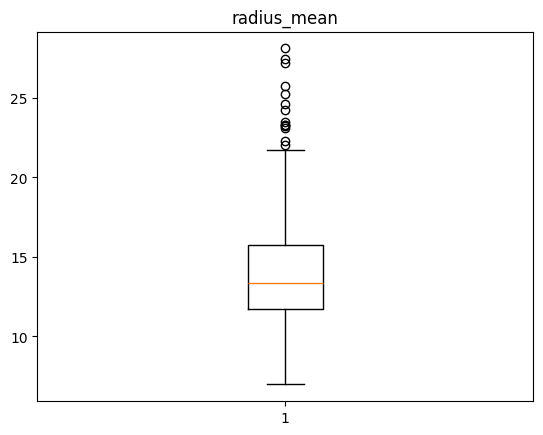

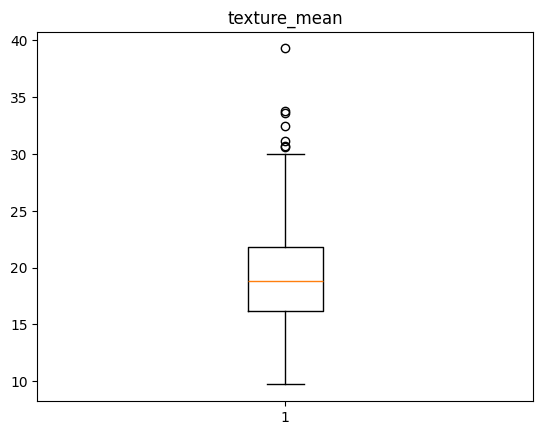

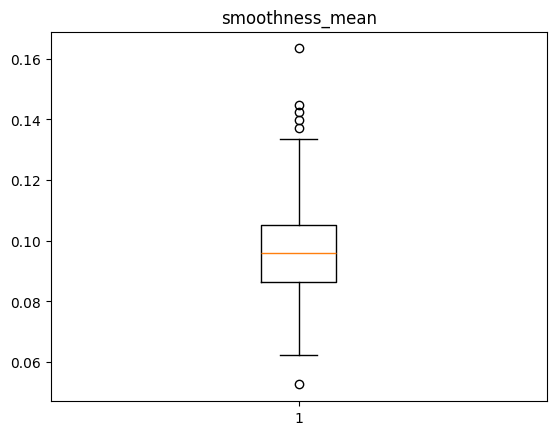

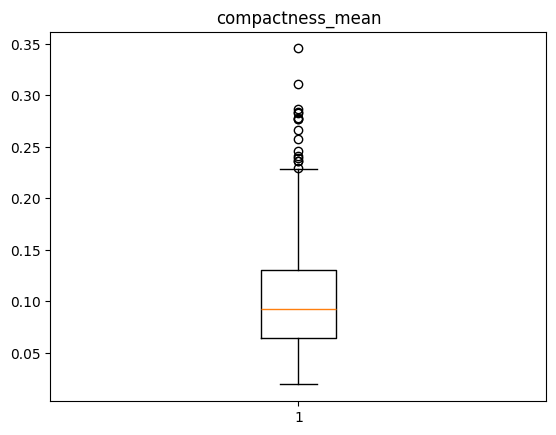

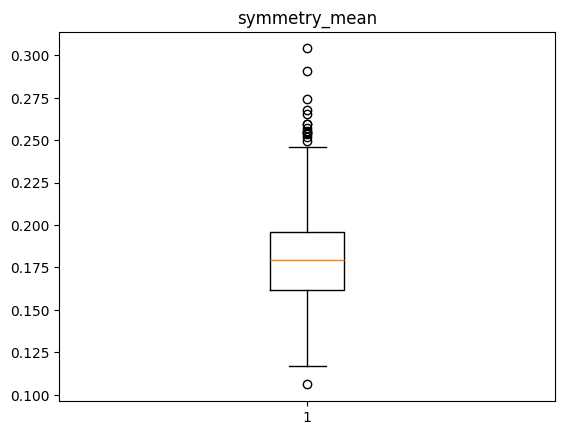

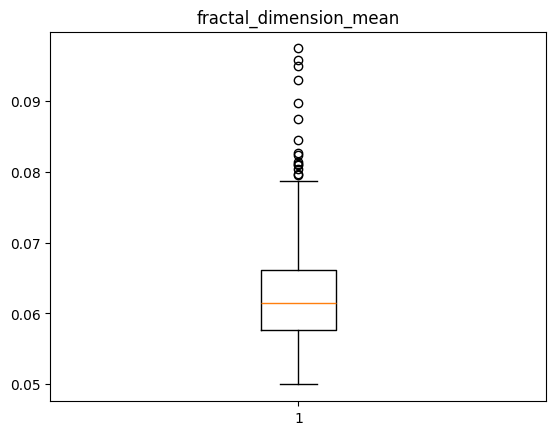

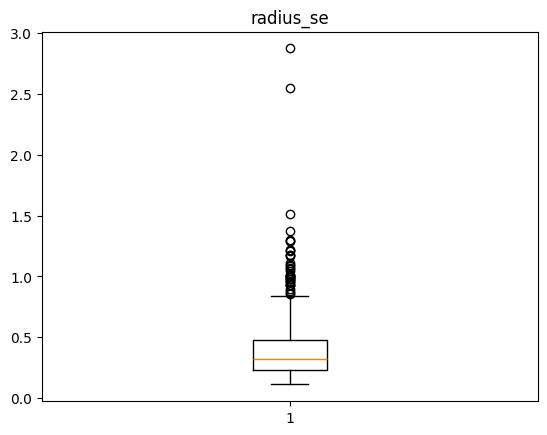

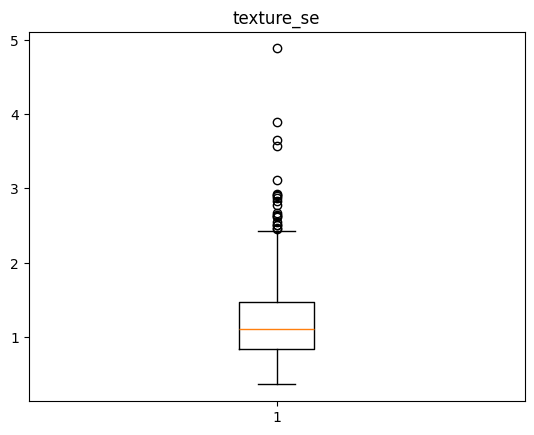

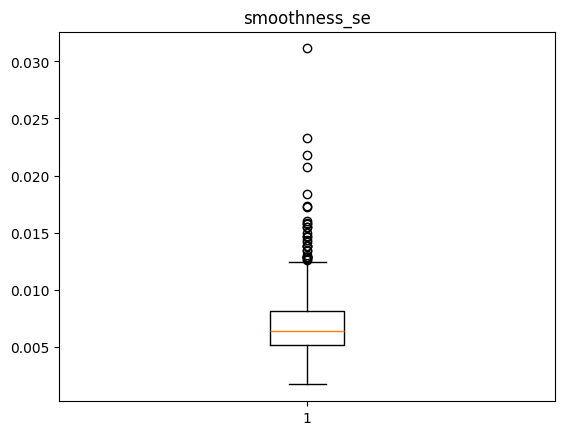

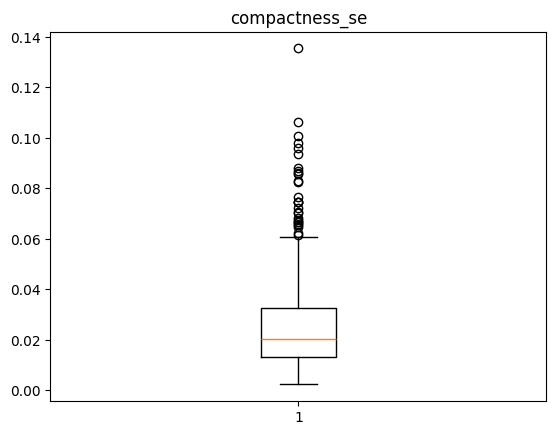

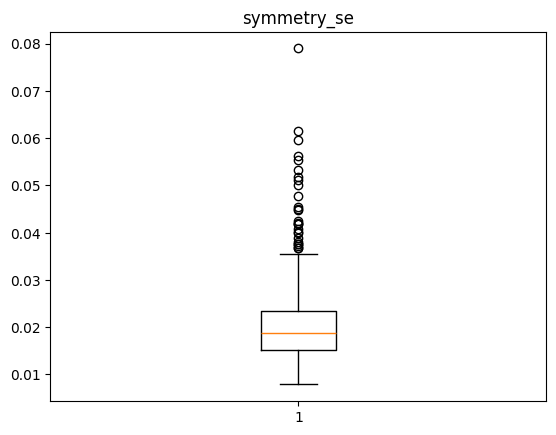

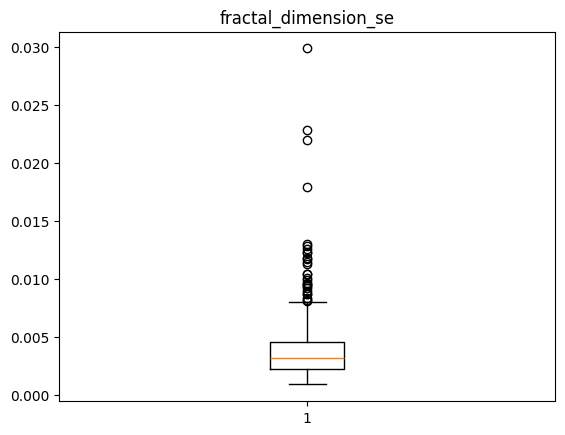

['radius_mean', 'texture_mean', 'radius_se', 'texture_se']


In [20]:
# Boxplots de cada variable
scale_cols = []
for col in data_df_num.columns:
    plt.boxplot(data_df[col])
    plt.title(col)
    plt.show()
    if data_df[col].min() < 0 or data_df[col].max() > 1:
      scale_cols.append(col)
print(scale_cols)

Con todo el análisis anterior, estamos listos para generar un modelo *baseline* denominado `logr_model`. Para ello:

5a) Vuelve a leer el contenido del archivo, haz que el `id` sea el índice y separa las variables del dataframe: en `X` coloca los predictores y en `y` la variable de respuesta o salida (`diagnosis`). Divide el conjunto en entrenamiento y prueba (80:20) considerando el parámetro `random_state` con el valor de 1.

In [21]:
# Dividir el conjunto
from sklearn.model_selection import train_test_split
data_df_original = pd.read_csv('data.csv', index_col='id')
X = data_df_original.drop('diagnosis', axis=1)
y = data_df_original['diagnosis']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

5b) Prepara un transformador, denominado `preprocessing`, para borrar las columnas altamente correlacionadas (las 18 variables que se determinaron en los ejercicios previos) Asegúrate de incluir el parámetro `remainder='passthrough'` para mantener el resto de las variables.

In [22]:
# Transformador para borrar columnas correlaciomadas
from sklearn.compose import ColumnTransformer
high_corr_cols = cols_to_drop + columns_worst
preprocessing = ColumnTransformer(
    transformers=[
        ('drop_cols', 'drop', high_corr_cols),
    ],
    remainder='passthrough'
)

5c) Entrena el modelo `logr_model` con el transformador `preprocessing` y  regresión logística.

Como la salida `y` está en términos de las etiquetas `'B'` y `'M'`, en lugar de 0 y 1, para evaluar el modelo en el conjunto de prueba deberás especificar la clase positiva. En el caso de la matriz de confusión, indica el orden de las etiquetas con `labels=['B','M']`, porque `'B'` es la clase negativa (ésta se especifica primero) y `'M'` la positiva. Para las métricas de *recall* y *precision*, utiliza el parámetro `pos_label='M'`. Como *accuracy* ocupa la suma de ambas clases y el total de las observaciones, no requiere ninguna especificación. Si quisieras omitir estos parámetros, tendrías que sustituir `'B'` por 0 y `'M'` por 1, previo a la construcción del modelo.

In [23]:
# Entrenar modelo logr
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
logr_model = Pipeline([
    ('preprocessing', preprocessing),
    ('classifier', LogisticRegression())
])
logr_model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/compose/_column_transformer.py:1623: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('drop_cols', 'drop',
                                                  ['perimeter_mean',
                                                   'area_mean',
                                                   'concavity_mean',
                                                   'concave points_mean',
                                                   'perimeter_se', 'area_se',
                                                   'concavity_se',
                                                   'concave points_se',
                                                   'radius_worst',
                                                   'texture_worst',
                                                   'perimeter_worst',
                                                   'area_worst',
                                                   'smoothness_worst',
                                                   'compactness_worst',
                                                   'concavity_worst',
                                                   'concave points_worst',
                                                   'symmetry_worst',
                                                   'fractal_dimension_worst'])])),
                ('classifier', LogisticRegression())])

In [24]:
# Evaluar el modelo
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
y_pred = logr_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
precision = precision_score(y_test, y_pred, pos_label='M')
print(f"Precision: {precision}")
recall = recall_score(y_test, y_pred, pos_label='M')
print(f"Recall: {recall}")
confusion_matrix(y_test, y_pred, labels=['B','M'])

Accuracy: 0.8771929824561403
Precision: 0.8888888888888888
Recall: 0.7619047619047619


array([[68,  4],
       [10, 32]])

Para generar un modelo `logr_model2` con transformación y escalamiento:

6a) Modifica el transformador anterior para, además del borrado de las columnas correlacionadas, aplicar la raíz cuadrada a los predictores con sesgo (previamente almacenados en `skew_cols`) y escalamiento *MinMax* a los predictores con escala mayor a 1 (previamente almacenados en `scale_cols`) Como no todos los predictores serán eliminados o transformados, asegúrate de incluir el parámetro `remainder='passthrough'`

In [25]:
# Transformación y escalamiento
from sklearn.preprocessing import MinMaxScaler, FunctionTransformer
preprocessing2 = ColumnTransformer(
    transformers=[
        ('drop_cols', 'drop', high_corr_cols),
        ('sqrt_skew', FunctionTransformer(np.sqrt), skew_cols),
        ('minmax_scale', MinMaxScaler(), scale_cols)],
    remainder='passthrough')

6b) Entrena el modelo `logr_model2` con regresión logística, aplicando previamente el transformador modificado. Evalúa el modelo en el conjunto de prueba con las mismas métricas.

In [26]:
# Entrenar el modelo
logr_model2 = Pipeline([
    ('preprocessing2', preprocessing2),
    ('classifier', LogisticRegression())
])
logr_model2.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/compose/_column_transformer.py:1623: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('preprocessing2',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('drop_cols', 'drop',
                                                  ['perimeter_mean',
                                                   'area_mean',
                                                   'concavity_mean',
                                                   'concave points_mean',
                                                   'perimeter_se', 'area_se',
                                                   'concavity_se',
                                                   'concave points_se',
                                                   'radius_worst',
                                                   'texture_worst',
                                                   'perimeter_worst',
                                                   'area_worst',
                                                   'smoothness_worst',
                                                   'compactness_worst',
                                                   'concavity_w...
                                                   'fractal_dimension_worst']),
                                                 ('sqrt_skew',
                                                  FunctionTransformer(func=<ufunc 'sqrt'>),
                                                  ['compactness_mean',
                                                   'fractal_dimension_mean',
                                                   'radius_se', 'texture_se',
                                                   'smoothness_se',
                                                   'compactness_se',
                                                   'symmetry_se',
                                                   'fractal_dimension_se']),
                                                 ('minmax_scale',
                                                  MinMaxScaler(),
                                                  ['radius_mean',
                                                   'texture_mean', 'radius_se',
                                                   'texture_se'])])),
                ('classifier', LogisticRegression())])

In [27]:
# Evaluar el modelo
y_pred = logr_model2.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
precision = precision_score(y_test, y_pred, pos_label='M')
print(f"Precision: {precision}")
recall = recall_score(y_test, y_pred, pos_label='M')
print(f"Recall: {recall}")
confusion_matrix(y_test, y_pred, labels=['B','M'])

Accuracy: 0.9035087719298246
Precision: 1.0
Recall: 0.7380952380952381


array([[72,  0],
       [11, 31]])

# **Parte 3**. Modelo con aplicación de PCA

7. Analizaremos el efecto de aplicar PCA a todas las variables. Recuerda que previo a aplicarlo es recomendado escalar todas las variables. Utiliza la clase `StandardScaler` para transformar `X`.

In [28]:
# Transformar X
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

8. Aplica PCA al conjunto escalado y determina el número de componentes que explican el 99% de la varianza.

In [29]:
# Aplicar PCA
from sklearn.decomposition import PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)
print(cumulative_variance_ratio)

[0.44272026 0.63243208 0.72636371 0.79238506 0.84734274 0.88758796
 0.9100953  0.92598254 0.93987903 0.95156881 0.961366   0.97007138
 0.97811663 0.98335029 0.98648812 0.98915022 0.99113018 0.99288414
 0.9945334  0.99557204 0.99657114 0.99748579 0.99829715 0.99889898
 0.99941502 0.99968761 0.99991763 0.99997061 0.99999557 1.        ]


In [30]:
# Componentes necesarios para 99% de varianza
num_components = np.argmax(cumulative_variance_ratio >= 0.99) + 1
print(f"Número de componentes que explican el 99% de la varianza: {num_components}")

Número de componentes que explican el 99% de la varianza: 17


9. Con el número de componentes determinado, estamos listos para generar un modelo `logr_model3` con PCA. Construye un pipeline que incluya el escalamiento estándar, el PCA con el número de componentes determinado y regresión logística. Entrena el modelo utilizando el  conjunto de entrenamiento y evalúalo en el conjunto de prueba con las mismas métricas.

In [31]:
# Modelo con PCA
logr_model3 = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=17)),
    ('classifier', LogisticRegression())
])
logr_model3.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('pca', PCA(n_components=17)),
                ('classifier', LogisticRegression())])

In [32]:
# Evaluar el modelo
y_pred = logr_model3.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
precision = precision_score(y_test, y_pred, pos_label='M')
print(f"Precision: {precision}")
recall = recall_score(y_test, y_pred, pos_label='M')
print(f"Recall: {recall}")
confusion_matrix(y_test, y_pred, labels=['B','M'])

Accuracy: 0.9824561403508771
Precision: 1.0
Recall: 0.9523809523809523


array([[72,  0],
       [ 2, 40]])

10. En un modelo de diagnóstico médico, ¿cuál consideras que es la métrica más importante? ¿Cómo cambiarías (disminuir/aumentar) el *threshold*? ¿Por qué?

En diagnósticos médicos, es crucial minimizar los falsos negativos, es decir, los casos en los que el modelo no detecta una enfermedad cuando realmente está presente. Esto es especialmente importante en condiciones graves, como es el caso del cáncer de mama. En estos casos, **la sensibilidad o recall es la métrica clave.**

Para mejorar la sensibilidad, se suele **disminuir el threshold**, lo que permite que el modelo clasifique más casos como positivos (aumentando los verdaderos positivos), ésto con la finalidad de minimizar los casos en donde a los pacientes se les da un diagnóstico falso cuando en realidad si padecen la enfermedad, lo que conllevaria a que no tuvieran el tratamiento adecuado.